<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 56px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">EDA</div>

***Notebook này được thiết kế để thực hiện các câu hỏi để khám phá dữ liệu***
<br>*Trong phần này, chúng ta sẽ đưa ra các câu hỏi để khám phá dữ liệu, sau đó trả lời và phân tích các câu hỏi này để tạo nên những lợi ích cho khách hàng.*

# **1 Import**

## **1.1 Thư viện**


*Khai báo các thư viện sử dụng trong notebook*


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1.2 Dữ liệu**

*Đọc file dữ liệu*

In [2]:
file_path = "data\cleaned_data_DS_Salary.csv"
cleaned_df = pd.read_csv(file_path)

*Nhìn 5 dòng đầu tiên của dữ liệu để có cái nhìn tổng quan nhất*

In [3]:
cleaned_df.head(5)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Same City
0,Data Scientist,53-91,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,0,1,1,0,0,0,data scientist,na,M,0
1,Healthcare Data Scientist,63-112,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,0,0,data scientist,na,M,0
2,Data Scientist,80-90,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,...,0,0,0,0,0,0,data scientist,na,M,1
3,Data Scientist,56-97,3.8,PNNL,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,...,0,0,0,0,0,0,data scientist,na,na,1
4,Data Scientist,86-143,2.9,Affinity Solutions,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,...,0,0,0,0,0,0,data scientist,na,na,1


Kiểm tra kiểu dữ liệu của các cột.

In [4]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Rating              742 non-null    float64
 3   Company Name        742 non-null    object 
 4   Location            742 non-null    object 
 5   Headquarters        742 non-null    object 
 6   Size                742 non-null    object 
 7   Founded             742 non-null    int64  
 8   Type of ownership   742 non-null    object 
 9   Industry            742 non-null    object 
 10  Sector              742 non-null    object 
 11  Revenue             742 non-null    object 
 12  Competitors         742 non-null    object 
 13  Hourly              742 non-null    int64  
 14  Employer provided   742 non-null    int64  
 15  Lower Salary        742 non-null    int64  
 16  Upper Sa

# **2 Khám phá dữ liệu**

## **2.1 Giá trị được phân phối như thế nào?**

### **2.1.1 Với mỗi cột có kiểu dữ liệu số, các giá trị được phân bổ như thế nào?**

Đối với các cột có kiểu dữ liệu số, ta sẽ tính:

- The mean
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range và IQR 

In [5]:
# Tạo dataframe để copy cleaned_df
num_col_df = cleaned_df.copy()

# Lọc ra các cột số
num_col_df = num_col_df.select_dtypes(include=['number'])

df_analyze = num_col_df.describe()
# Tính IQR
Q1 = num_col_df.quantile(0.25)
Q3 = num_col_df.quantile(0.75)
IQR = Q3 - Q1

# Thêm IQR vào cuối df_analyze
df_analyze.loc['IQR'] = IQR

df_analyze

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,Same City
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,98.448327,50.322102,0.528302,0.225067,...,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868,0.557951
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,32.364311,54.026459,0.499535,0.417908,...,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150,0.496965
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,25.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,75.500000,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,98.500000,28.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,120.000000,63.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,177.000000,280.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IQR,0.700000,68.000000,0.000000,0.000000,39.000000,59.000000,44.500000,48.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


**Nhận xét**

### **2.1.2 Với mỗi cột có kiểu dữ liệu không phải số, các giá trị được phân bổ như thế nào?**

Đối với các cột có kiểu dữ liệu không phải số, ta sẽ tính:

- Số lượng giá trị
- Tỷ lệ phần trăm (từ 0 đến 100) của mỗi giá trị được sắp xếp theo tỷ lệ phần trăm giảm dần

In [6]:
pd.set_option('display.max_colwidth', 200)

cat_col_info_df = cleaned_df.select_dtypes(exclude=['number'])
cat_col_info_df

# Hàm để tính số lượng giá trị duy nhất
def num_values(x):
    return len(x.dropna().unique())

# Hàm để tính các tỷ lệ giá trị
def value_ratios(x):
    # Tạo một Series với tỷ lệ xuất hiện của từng giá trị
    value_counts = x.value_counts(normalize=True)

    # Sắp xếp theo tỷ lệ giảm dần
    sorted_value_counts = value_counts.sort_values(ascending=False)
    
    # Lưu vào từ điển
    value_ratios = {value: round(percentage * 100, 1) for value, percentage in sorted_value_counts.items()}
    
    return value_ratios

# Gán DataFrame mới để lưu kết quả
cat_col_info_df = cat_col_info_df.agg([num_values, value_ratios])
cat_col_info_df

,Job Title,Salary Estimate,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,company_txt,Job Location,job_title_sim,seniority_by_title,Degree
num_values,264,416,343,200,198,8,9,60,25,13,128,343,37,10,3,3
value_ratios,"{'Data Scientist': 17.7, 'Data Engineer': 7.1, 'Senior Data Scientist': 4.6, 'Data Analyst': 2.0, 'Senior Data Engineer': 1.9, 'Senior Data Analyst': 1.6, 'Lead Data Scientist': 1.1, 'Marketing Da...","{'49-113 ': 0.8, '54-115 ': 0.8, '21-34': 0.8, '86-143 ': 0.8, '74-124 ': 0.7, '76-142 ': 0.7, '107-173 ': 0.7, '81-167 ': 0.7, '44-78 ': 0.5, '44-86 ': 0.5, '35-62 ': 0.5, '64-106 ': 0.5, '39-66 ...","{'MassMutual': 1.9, 'Takeda Pharmaceuticals': 1.9, 'Reynolds American': 1.9, 'Software Engineering Institute': 1.5, 'PNNL': 1.3, 'Liberty Mutual Insurance': 1.3, 'AstraZeneca': 1.2, 'MITRE': 1.1, ...","{'New York, NY': 7.4, 'San Francisco, CA': 6.6, 'Cambridge, MA': 6.3, 'Chicago, IL': 4.3, 'Boston, MA': 3.1, 'San Jose, CA': 1.8, 'Pittsburgh, PA': 1.6, 'Washington, DC': 1.5, 'Rockville, MD': 1.5...","{'New York, NY': 7.0, 'San Francisco, CA': 5.7, 'Chicago, IL': 4.0, 'Cambridge, MA': 2.7, 'Springfield, MA': 1.9, 'Boston, MA': 1.9, 'Winston-Salem, NC': 1.9, 'OSAKA, Japan': 1.9, 'Richland, WA': ...","{'1001 - 5000 ': 20.2, '501 - 1000 ': 18.1, '10000+ ': 17.5, '201 - 500 ': 15.8, '51 - 200 ': 12.7, '5001 - 10000 ': 10.2, '1 - 50 ': 4.2, 'unknown': 1.3}","{'Company - Private': 55.3, 'Company - Public': 26.0, 'Nonprofit Organization': 7.4, 'Subsidiary or Business Segment': 4.6, 'Government': 2.0, 'Hospital': 2.0, 'College / University': 1.8, 'Other ...","{'Biotech & Pharmaceuticals': 15.1, 'Insurance Carriers': 8.5, 'Computer Hardware & Software': 8.0, 'IT Services': 6.7, 'Health Care Services & Hospitals': 6.6, 'Enterprise Software & Network Solu...","{'Information Technology': 24.3, 'Biotech & Pharmaceuticals': 15.1, 'Business Services': 13.1, 'Insurance': 9.3, 'Health Care': 6.6, 'Finance': 5.7, 'Manufacturing': 4.6, 'Aerospace & Defense': 3....","{'Unknown / Non-Applicable': 27.5, '$10+ billion (USD)': 16.7, '$100 to $500 million (USD)': 12.3, '$1 to $2 billion (USD)': 8.1, '$500 million to $1 billion (USD)': 7.7, '$50 to $100 million (USD...","{'-1': 62.0, 'Novartis, Baxter, Pfizer': 1.9, 'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory': 1.6, 'Travelers, Allstate, State Farm': 1.3, 'Roche, G...","{'MassMutual': 1.9, 'Takeda Pharmaceuticals': 1.9, 'Reynolds American': 1.9, 'Software Engineering Institute': 1.5, 'PNNL': 1.3, 'Liberty Mutual Insurance': 1.3, 'AstraZeneca': 1.2, 'MITRE': 1.1, ...","{'CA': 20.5, 'MA': 13.9, 'NY': 9.7, 'VA': 5.5, 'IL': 5.4, 'MD': 4.7, 'PA': 4.4, 'TX': 3.8, 'WA': 2.8, 'NC': 2.8, 'NJ': 2.3, 'FL': 2.2, 'OH': 1.9, 'TN': 1.8, 'DC': 1.5, 'CO': 1.5, 'UT': 1.3, 'IN': ...","{'data scientist': 42.2, 'other scientist': 19.3, 'data engineer': 16.0, 'analyst': 13.6, 'machine learning engineer': 3.0, 'Data scientist project manager': 2.2, 'na': 1.3, 'data analitics': 1.1,...","{'na': 69.9, 'sr': 29.6, 'jr': 0.4}","{'na': 51.6, 'M': 34.0, 'P': 14.4}"


## **2.2 Mối tương quan giữa các cột số**

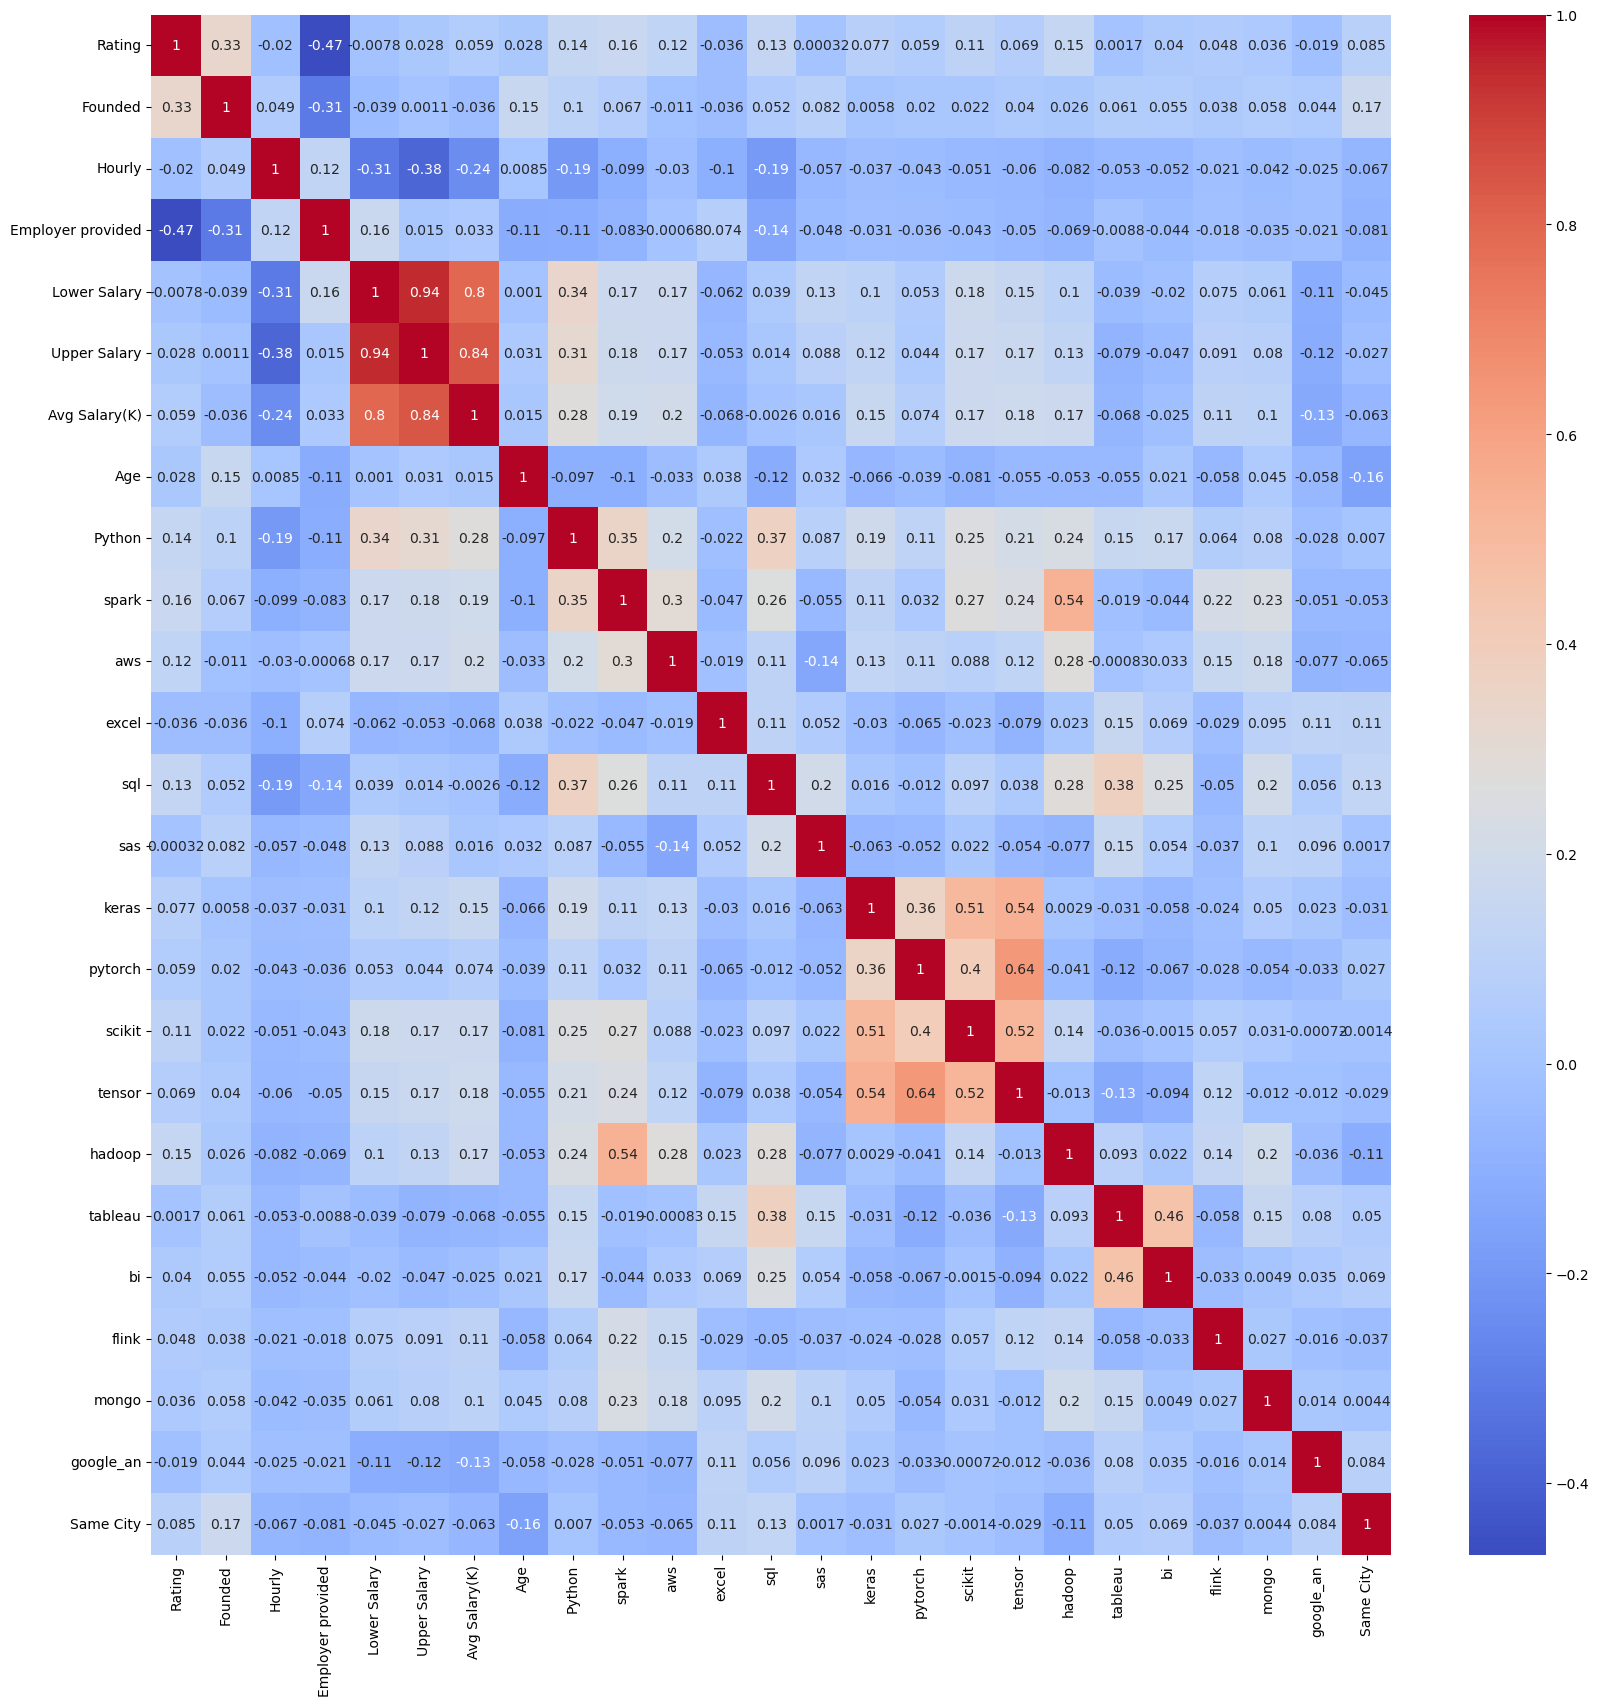

In [7]:
corr_matrix = num_col_df.corr()


plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', cbar = True)
plt.show()

**Nhận xét**

## **2.3 Câu hỏi để khám phá dữ liệu**

### **2.3.1 Câu hỏi 1.** Mối tương quan giữa top 5 kĩ năng, công cụ được đòi hỏi cho công việc được nhiều người thành thạo nhất so với mức lương trung bình.

In [8]:
# Chọn ra các cột kỹ năng, công cụ
skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

skills_counts = cleaned_df[skills_columns][cleaned_df[skills_columns] == 1].count()

top_5_skills = skills_counts.nlargest(5)

print(top_5_skills)

Python    392
excel     388
sql       380
aws       176
spark     167
dtype: int64


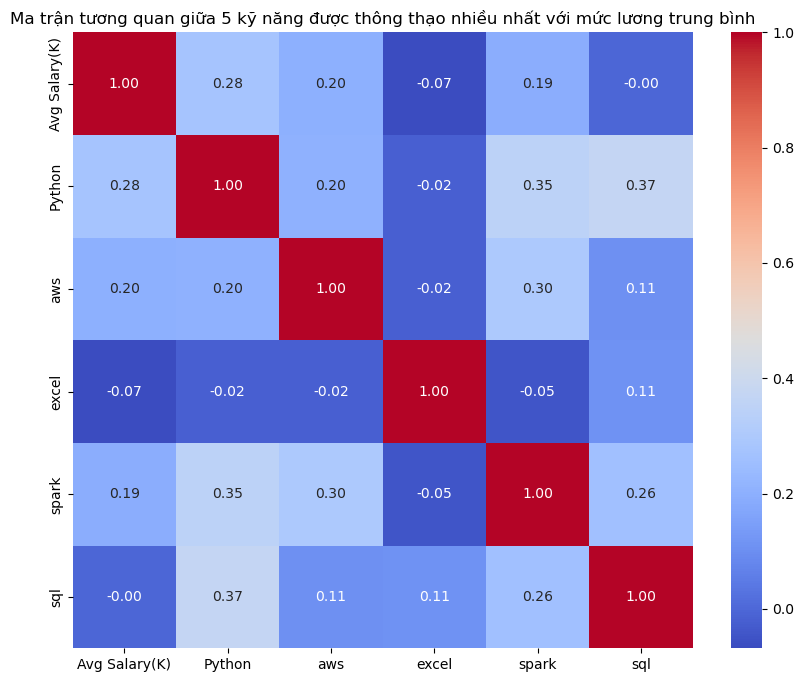

In [17]:
# Lấy ra 5 kĩ năng
top_5_skills_names = top_5_skills.index

# Thêm cột Ava Salary(K)
columns_for_correlation = top_5_skills_names.union(['Avg Salary(K)'])

# Tính toán ma trận tương quan
correlation_matrix = cleaned_df[columns_for_correlation].corr()

# Tạo khung 
plt.figure(figsize=(10, 8))

# Vẽ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa 5 kỹ năng được thông thạo nhiều nhất với mức lương trung bình')

plt.show()

**Nhận xét:**
- Biểu đồ cho thấy mối tương quan mạnh mẽ giữa Python và các kỹ năng khác. Python có mối tương quan dương mạnh với AWS, Excel, Spark và SQL. Điều này cho thấy Python là một kỹ năng nền tảng quan trọng cho những người muốn phát triển trong lĩnh vực khoa học dữ liệu và phân tích dữ liệu.
- Biểu đồ cũng cho thấy mối tương quan mạnh mẽ giữa AWS và các kỹ năng khác. AWS có mối tương quan dương mạnh với Excel, Spark và SQL. Điều này cho thấy AWS là một kỹ năng quan trọng cho những người muốn làm việc với dữ liệu trên đám mây.
- Biểu đồ cho thấy mối tương quan vừa phải giữa Excel và các kỹ năng khác. Excel có mối tương quan dương vừa phải với Spark và SQL. Điều này cho thấy Excel là một kỹ năng hữu ích cho những người muốn làm việc với dữ liệu, nhưng không phải là kỹ năng cần thiết.
- Biểu đồ cho thấy mối tương quan yếu giữa Spark và SQL. Spark có mối tương quan dương yếu với SQL. Điều này cho thấy Spark và SQL là hai kỹ năng riêng biệt, nhưng có thể được sử dụng cùng nhau để phân tích dữ liệu phức tạp.
- Biểu đồ cho thấy mối tương quan yếu giữa mức lương trung bình và các kỹ năng khác. Mức lương trung bình có mối tương quan dương yếu với Python, AWS, Excel và Spark. Điều này cho thấy mức lương trung bình có thể không được dự đoán một phần dựa trên mức độ thông thạo của các kỹ năng này.

### **2.3.2 Câu hỏi 2.** Mức lương trung bình của các vị trí công việc có phân phối như thế nào? Có sự biến thiên lớn không?

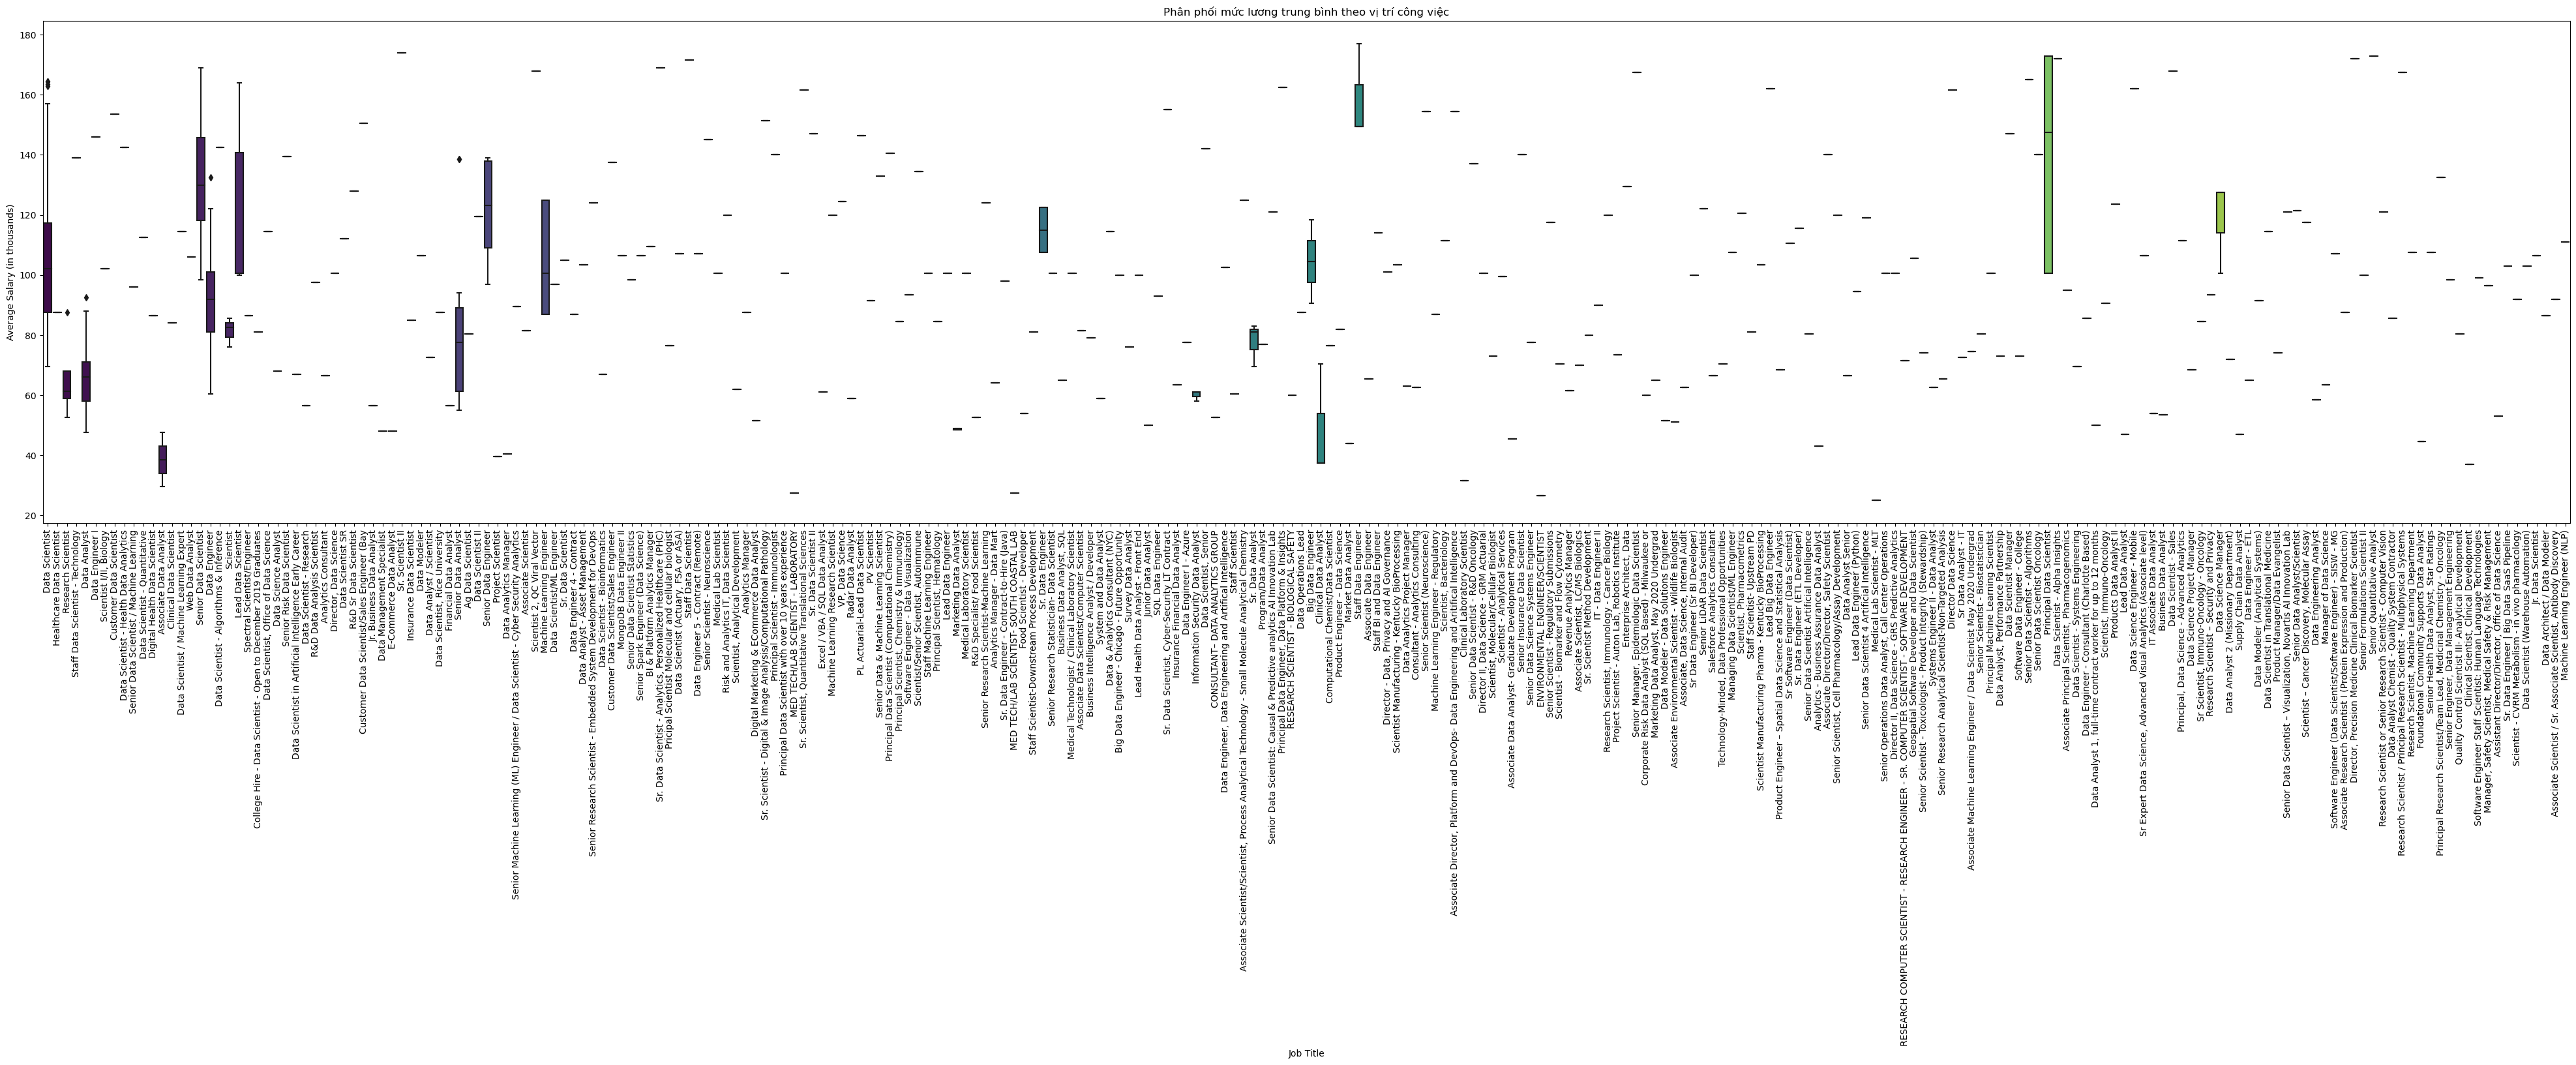

In [18]:
# Lọc ra các phần tử duy nhất từ cột 'Job Title'
job_titles = cleaned_df['Job Title'].unique()

# Tạo DataFrame mới chỉ chứa các dòng có 'Job Title' trong danh sách job_titles
filtered_df = cleaned_df[cleaned_df['Job Title'].isin(job_titles)]

# Cài đặt biểu đồ để dễ quan sát, vì chữ khá dài
plt.figure(figsize=(50, 10))

# Vẽ
sns.boxplot(x='Job Title', y='Avg Salary(K)', data=filtered_df, palette='viridis')

# Xoay giá trị cột x 90 độ để dễ quan sát
plt.xticks(rotation=90)

plt.title('Phân phối mức lương trung bình theo vị trí công việc')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (in thousands)')

plt.show()

**Nhận xét:**
- Sự phân bố: Mức lương trung bình cho các vị trí công việc có sự phân bố không đều đặn. Nhóm lương thấp và nhóm lương trung bình chiếm tỷ lệ cao hơn so với nhóm lương cao.
- Mối liên hệ: Có thể quan sát thấy mối liên hệ giữa vị trí công việc và mức lương trung bình. Các vị trí công việc đòi hỏi trình độ chuyên môn cao hơn thường có mức lương trung bình cao hơn.
- Xu hướng: Không có xu hướng rõ ràng về sự thay đổi của mức lương trung bình theo vị trí công việc.
- Nhận xét tổng thể: Biểu đồ cho thấy mức lương trung bình cho các vị trí công việc có sự chênh lệch khá lớn. Các vị trí công việc đòi hỏi trình độ chuyên môn cao hơn thường có mức lương trung bình cao hơn.

# **3 Câu hỏi ý nghĩa**

## **3.1 Câu hỏi 1. Có mối liên hệ nào giữa rating của công ty và mức lương trung bình mà công ty trả cho nhân viên không? Công ty có điểm rating cao có trend đưa ra mức lương cao hơn hay không?** 

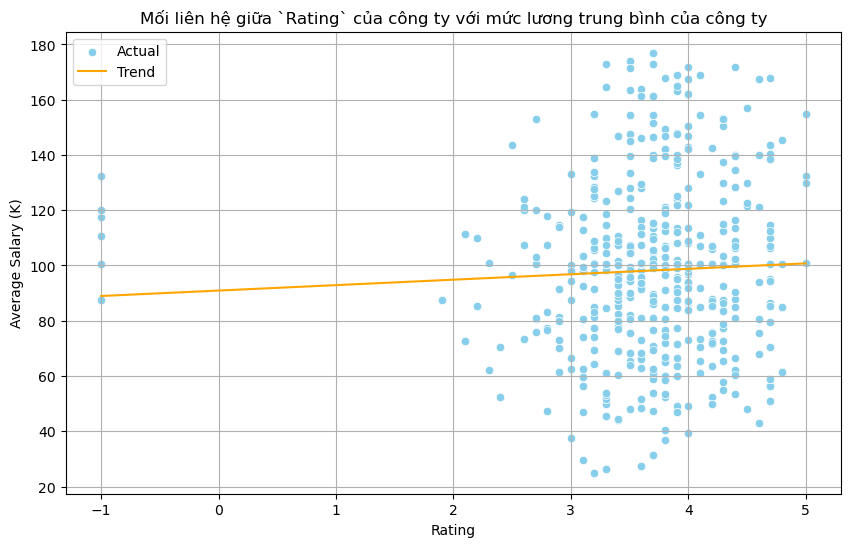

In [14]:
df = cleaned_df.copy()

# Tính toán mức lương trung bình theo Rating
avg_salary_by_rating = df.groupby('Rating')['Avg Salary(K)'].mean().reset_index()

# Vẽ biểu đồ phân tán kết hợp với đường trend
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Rating', y='Avg Salary(K)', data=df, color='skyblue', label='Actual')

# Trend line
z = np.polyfit(avg_salary_by_rating['Rating'], avg_salary_by_rating['Avg Salary(K)'], 1)
p = np.poly1d(z)
plt.plot(avg_salary_by_rating['Rating'], p(avg_salary_by_rating['Rating']), color='orange', linestyle='-', label='Trend')

plt.xlabel('Rating')
plt.ylabel('Average Salary (K)')
plt.title('Mối liên hệ giữa `Rating` của công ty với mức lương trung bình của công ty')
plt.legend()
plt.grid(True)
plt.show()

**Nhận xét:**
- Phân bố:
    + Các điểm dữ liệu trong biểu đồ phân bố tương đối đều đặn, tuy nhiên ta có thể quan sát thấy một số điểm dữ liệu nằm ngoài vùng xu hướng chung.
    + Các điểm dữ liệu tập trung nhiều từ mức rating 3 trở lên; đặc biệt là dày đặc ở mức rating 3 đến 4 với mức lương trung bình từ 60K đến 120K.
- Mối liên hệ:
    + Nhìn vào biểu đồ, ta có thể thấy mối liên hệ `tích cực` giữa `Rating` và `Average Salary`.
    + Khi "Rating" tăng, "Average Salary" cũng có xu hướng tăng.
    + Mối liên hệ này có thể được lý giải bởi các công ty có rating cao thường là những công ty có môi trường làm việc tốt, chế độ đãi ngộ hấp dẫn, do đó thu hút được nhân viên giỏi và trả mức lương cao hơn.
- Xu hướng:
    + Xu hướng chung của biểu đồ là đường hồi quy tuyến tính đi qua các điểm dữ liệu.
    + Đường hồi quy tuyến tính cho thấy mức lương trung bình của công ty có xu hướng tăng khoảng 20 ngàn đồng cho mỗi điểm rating tăng.
- Tổng thể:
    + Mặc dù xu hướng các công ty có rating cao thường có mức lương trung bình cao hơn. Tuy nhiên, ta có thể thấy ở mức rating 5.0, mức lương của các công ty này vẫn thấp hơn các công ty ở mức rating thấp hơn.
    + Do đó, cần lưu ý rằng đây chỉ là mối liên hệ thống kê và không thể khẳng định chắc chắn rằng tất cả các công ty có rating cao đều có mức lương trung bình cao.

## **3.2 Câu hỏi 2.** 